# Figure 4 - Actual Power & CI Coverage under various SE inflation scenarios

In [1]:
from scipy.stats import norm
from scipy.optimize import brentq
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sd_multipliers = np.linspace(0.5, 5, 46)
sd_multipliers

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

# Actual CI Coverage

In [3]:
actual_CI_coverage = pd.DataFrame(
    sd_multipliers, 
    columns=['sd_multipliers']
)

for (nominal_CI_coverage, nominal_CI_coverage_label) in [
    (0.9, '90%'), (0.95, '95%'), (0.99, '99%'), (0.999, '99.9%')]:
    
    nominal_one_tail_probability = (1 - nominal_CI_coverage) / 2
    actual_t_statistic = norm.ppf(1 - nominal_one_tail_probability) / sd_multipliers
    actual_one_tail_probability = 1 - norm.cdf(actual_t_statistic)
    actual_CI_coverage[nominal_CI_coverage_label] = 1 - actual_one_tail_probability * 2
    
actual_CI_coverage = actual_CI_coverage.set_index('sd_multipliers')

In [4]:
actual_CI_coverage

,90%,95%,99%,99.9%
sd_multipliers,,,,
0.5,0.998997,0.999911,1.000000,1.000000
0.6,0.993883,0.998912,0.999982,1.000000
0.7,0.981216,0.994889,0.999767,0.999997
0.8,0.960224,0.985713,0.998717,0.999961
0.9,0.932393,0.970574,0.995791,0.999744
1.0,0.900000,0.950000,0.990000,0.999000
1.1,0.865169,0.925216,0.980802,0.997223
1.2,0.829535,0.897595,0.968169,0.993895
1.3,0.794226,0.868360,0.952454,0.988632


/var/folders/bf/0lrr9t1d68j2gkrzm2fgq47r0000gq/T/ipykernel_32940/147622625.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  actual_CI_coverage_plot.show()


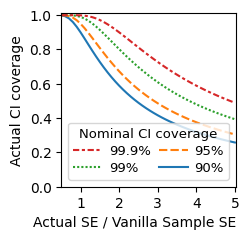

In [5]:
actual_CI_coverage_plot = plt.figure(figsize=(2.25, 2.25))

actual_CI_coverage_plot_ax = sns.lineplot(data=actual_CI_coverage)

actual_CI_coverage_plot_ax.set_xlabel('Actual SE / Vanilla Sample SE', x=0.42)
actual_CI_coverage_plot_ax.set_ylabel('Actual CI coverage')
actual_CI_coverage_plot_ax.set_xlim((0.5, 5.02))
actual_CI_coverage_plot_ax.set_ylim((0, 1.01))
actual_CI_coverage_plot_ax.set_xticks([1,2,3,4,5])

actual_CI_coverage_plot_handles, actual_CI_coverage_plot_labels = (
    actual_CI_coverage_plot_ax.get_legend_handles_labels()
)
actual_CI_coverage_plot_ax.legend(
    actual_CI_coverage_plot_handles[::-1],
    actual_CI_coverage_plot_labels[::-1],
    title='Nominal CI coverage', 
    ncol=2,
    handletextpad=0.5,
    handlelength=2.2,
    columnspacing=0.6,
    labelspacing=0.3,
    title_fontsize=9.5,
    fontsize=9.5
)

actual_CI_coverage_plot.add_axes(actual_CI_coverage_plot_ax)

actual_CI_coverage_plot.show()

In [6]:
actual_CI_coverage_plot.savefig("./data/plot_actual_CI_coverage_plot.pdf", bbox_inches="tight")

# Actual Test Power

In [7]:
def z_test_power(theta: float, standard_error: float = 1, alpha: float = 0.05):
    return(
        1 - norm.cdf(norm.ppf(1 - alpha/2) - theta / standard_error) +
        norm.cdf(-norm.ppf(1 - alpha/2) - theta / standard_error)
    )

In [8]:
actual_test_power = pd.DataFrame(
    sd_multipliers, 
    columns=['sd_multipliers']
)

for (significance_level, significance_level_label) in [
    (0.1, '10%'), (0.05, '5%'), (0.01, '1%'), (0.001, '0.1%')]:
    
    theta_for_80_percent_power = (
        brentq(lambda theta: z_test_power(theta, standard_error=1, alpha=significance_level) - 0.8,
               a=2, b=5)
    )
    
    actual_test_power[significance_level_label] = (
        z_test_power(theta_for_80_percent_power, 
                     standard_error=sd_multipliers, 
                     alpha=significance_level)
    )
    
actual_test_power = actual_test_power.set_index('sd_multipliers')

In [9]:
actual_test_power

,10%,5%,1%,0.1%
sd_multipliers,,,,
0.5,0.999563,0.999865,0.999990,1.000000
0.6,0.993776,0.996629,0.999096,0.999839
0.7,0.971750,0.979439,0.989451,0.995506
0.8,0.928289,0.938465,0.955056,0.969580
0.9,0.868184,0.875525,0.889021,0.903328
1.0,0.800000,0.800000,0.800000,0.800000
1.1,0.730941,0.721377,0.702271,0.679382
1.2,0.665468,0.646062,0.607207,0.560773
1.3,0.605749,0.577362,0.521126,0.455431


/var/folders/bf/0lrr9t1d68j2gkrzm2fgq47r0000gq/T/ipykernel_32940/808833368.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  actual_test_power_plot.show()


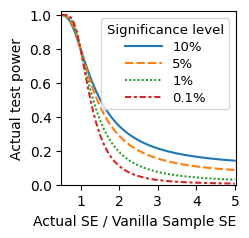

In [10]:
actual_test_power_plot = plt.figure(figsize=(2.25, 2.25))
actual_test_power_plot_ax = sns.lineplot(data=actual_test_power)

actual_test_power_plot_ax.set_xlabel('Actual SE / Vanilla Sample SE', x=0.42)
actual_test_power_plot_ax.set_ylabel('Actual test power')
actual_test_power_plot_ax.set_xlim((0.5, 5.02))
actual_test_power_plot_ax.set_ylim((0, 1.02))
actual_test_power_plot_ax.set_xticks([1,2,3,4,5])
actual_test_power_plot_ax.legend(title='Significance level',
                                 labelspacing=0.3,
                                 handlelength=2.8,
                                 title_fontsize=9.5,
                                 fontsize=9.5)

actual_test_power_plot.show()

In [11]:
actual_test_power_plot.savefig("./data/plot_actual_test_power_plot.pdf", bbox_inches="tight")